In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [20]:
# 로그 파일 경로
log_file_path = "learner.log"

# 1. 로그 파일 읽기
with open(log_file_path, "r") as log_file:
    logs = log_file.readlines()


# 2. 정규 표현식으로 로그 구조화
structured_logs = []

message_pattern  = r"value loss: ([\d.]+), policy gradient loss: ([\d.]+), entropy: ([\-\d.]+), IS max: ([\d.]+), IS min: ([\d.]+), IS avg: ([\d.]+), batching time: ([\d.]+), forward time: ([\d.]+), backward time: ([\d.]+)"
message_pattern2  = r"value loss: ([\d.]+), policy gradient loss: ([\-\d.]+), entropy: ([\-\d.]+), IS max: ([\d.]+), IS min: ([\d.]+), IS avg: ([\d.]+), batching time: ([\d.]+), forward time: ([\d.]+), backward time: ([\d.]+)"

for log in logs:
    # print(log)
    match = re.search(message_pattern, log)
    match2 = re.search(message_pattern2, log)
    if match:
        critic_loss, policy_gradient_loss, entropy, max_is, min_is, avg_is, batching_time, forward_time, backward_time= match.groups()
        structured_logs.append((float(critic_loss), float(entropy), float(max_is), float(min_is), float(avg_is), float(batching_time), float(forward_time), float(backward_time)))
    elif match2:
        critic_loss, policy_gradient_loss, entropy, max_is, min_is, avg_is, batching_time, forward_time, backward_time= match2.groups()
        structured_logs.append((float(critic_loss), float(entropy), float(max_is), float(min_is), float(avg_is), float(batching_time), float(forward_time), float(backward_time)))

# 3. Pandas or Numpy 배열로 변환
df = pd.DataFrame(structured_logs, columns=["critic_loss", "entropy", "max_is", "min_is" , "avg_is", "batching_time", "forward_time", "backward_time"])
# log_array = np.array(structured_logs, dtype=int)
# len(log_array) = 2500
# df.head()
# df["score"].mean(), df["score"].max(), df["score"].min(), df["score"].median(), df["score"].quantile(0.90)
# df_samples = df.iloc[::10, :]
len(df)


1433

In [46]:
df.tail()

,critic_loss,entropy,max_is,min_is,avg_is,batching_time,forward_time,backward_time
1428,0.008218,-0.598083,0.983674,0.330511,0.754378,0.004682,0.000216,0.000658
1429,0.002543,-0.625356,0.937675,0.445892,0.731396,0.005490,0.000236,0.000920
1430,0.002810,-0.583308,0.962609,0.409976,0.739669,0.005397,0.000299,0.000897
1431,0.115652,-0.631410,0.942226,0.328127,0.714826,0.004438,0.000250,0.000624
1432,0.013229,-0.627077,0.973280,0.361038,0.745186,0.004803,0.000206,0.000831


In [50]:
df.max(), df.min(), df.mean()  


(critic_loss      29.165951
 entropy          -0.231210
 max_is           10.667674
 min_is            0.919435
 avg_is            1.013505
 batching_time     0.049741
 forward_time      0.004275
 backward_time     0.020230
 dtype: float64,
 critic_loss      0.000435
 entropy         -0.709540
 max_is           0.900788
 min_is           0.000100
 avg_is           0.538434
 batching_time    0.002973
 forward_time     0.000189
 backward_time    0.000470
 dtype: float64,
 critic_loss      0.383143
 entropy         -0.535012
 max_is           1.388451
 min_is           0.157140
 avg_is           0.684568
 batching_time    0.006426
 forward_time     0.000329
 backward_time    0.000795
 dtype: float64)

In [43]:
mean(df["batching_time"]), sum(df["forward_time"]), sum(df["backward_time"])

NameError: name 'mean' is not defined

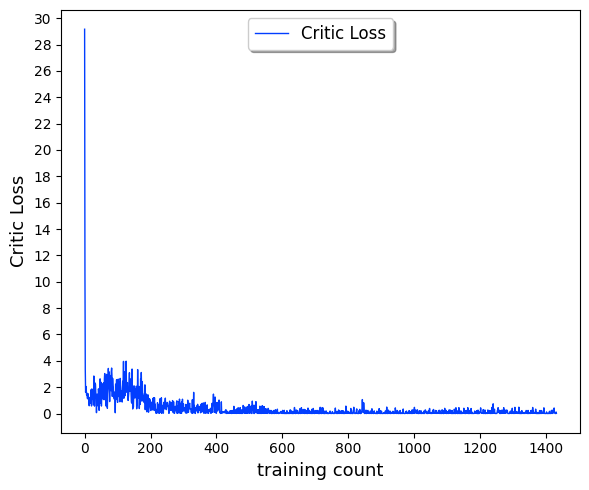

In [40]:
colors = sns.color_palette('bright', n_colors=5)
# colors = sns.color_palette('Set1', n_colors=10)
parameters = ["critic_loss"]
name = ["Critic Loss"]

# 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=11) # figure title 폰트 크기


plt.plot(range(len(df)), df["critic_loss"], color=colors[0], linestyle='-', label=name[0], linewidth=1.0)

# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=3)

# plt.legend()
# plt.xticks([500, 1000, 1500, 2000, 2500])
# plt.yticks(range(0, max(df["score"]) + 1, 50))
# plt.title("Episodic Returns(Sum of Rewards Each Episode)", loc="left")
plt.xlabel("training count")
plt.ylabel(name[0])
# plt.ylim([-50, 500])
# plt.xlim([0, 2500])

yticks = np.arange(0, 32, 2)
plt.yticks(yticks)

# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(name[0] +'.png')
plt.show()

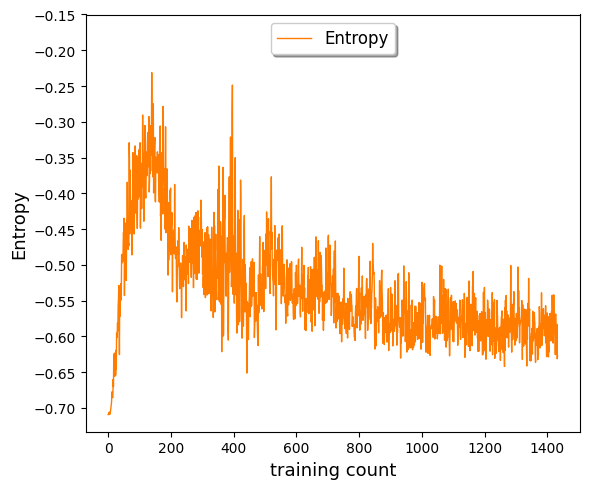

In [37]:
colors = sns.color_palette('bright', n_colors=5)
parameters = ["entropy"]
name = ["Entropy"]
# line_styles = ['--', '-', '-.', '--']
# markers = ['.', 's', '^', '.']

# "critic_loss", "entropy", "min_is", "max_is", "avg_is", "batching_time", "forward_time", "backward_time", "episode"
# 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=11) # figure title 폰트 크기

# for i in range(len(parameters)):
#     plt.plot(df["episode"], df[parameters[i]], color=colors[i] , marker='o', linestyle='-', label="All Acotrs", linewidth=1.0, markevery=10, markersize=3.0)
#     # range(len(df))

plt.plot(range(len(df)), df[parameters[0]], color=colors[1], linestyle='-', label=name[0], linewidth=1.0)

# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=3)

# plt.legend()
# plt.xticks([500, 1000, 1500, 2000, 2500])
# plt.yticks(range(0, max(df["score"]) + 1, 50))
# plt.title("Episodic Returns(Sum of Rewards Each Episode)", loc="left")
plt.xlabel("training count")
plt.ylabel(name[0])
# plt.ylim([-50, 500])
# plt.xlim([0, 2500])
yticks = np.arange(-0.7, -0.1, 0.05)
plt.yticks(yticks)

# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(name[0] +'.png')
plt.show()

In [24]:
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

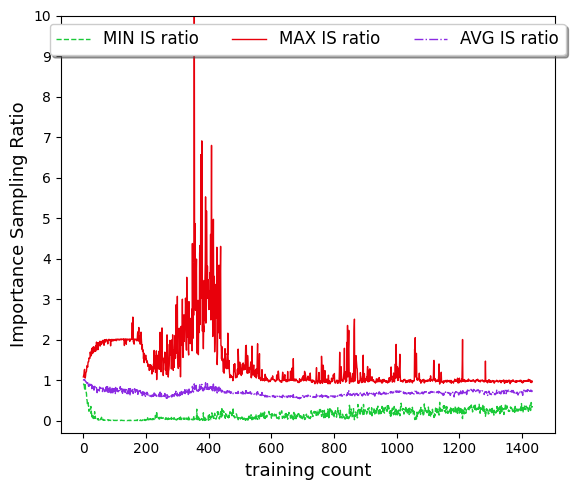

In [31]:
colors = sns.color_palette('bright', n_colors=5)
parameters = ["min_is", "max_is", "avg_is"]
name = ["MIN IS ratio", "MAX IS ratio", "AVG IS ratio"]
line_styles = ['--', '-', '-.']
# markers = ['.', 's', '^', '.']

# "critic_loss", "entropy", "min_is", "max_is", "avg_is", "batching_time", "forward_time", "backward_time", "episode"
# 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=11) # figure title 폰트 크기

for i in range(len(parameters)):
    plt.plot(range(len(df)), df[parameters[i]], color=colors[i+2], linestyle=line_styles[i], label=name[i], linewidth=1.0)


# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=3)

# plt.legend()
# plt.xticks([500, 1000, 1500, 2000, 2500])
# plt.yticks(range(0, max(df["score"]) + 1, 50))
# plt.title("Episodic Returns(Sum of Rewards Each Episode)", loc="left")
plt.xlabel("training count")
plt.ylabel("Importance Sampling Ratio")
plt.ylim([-0.3, 10])
# plt.xlim([0, 2500])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # 원하는 값으로 설정

# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("Importance Sampling Ratio" +'.png')
plt.show()

In [26]:
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

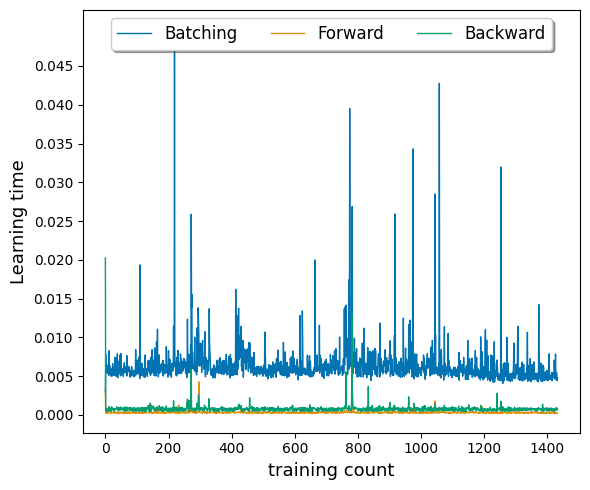

In [34]:
colors = sns.color_palette('colorblind', n_colors=5)
parameters = ["batching_time", "forward_time", "backward_time"]
name = ["Batching","Forward", "Backward"]
line_styles = ['-', '-', '-']
# markers = ['.', 's', '^', '.']

# "critic_loss", "entropy", "min_is", "max_is", "avg_is", "batching_time", "forward_time", "backward_time", "episode"
# 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=11) # figure title 폰트 크기

for i in range(len(parameters)):
    plt.plot(range(len(df)), df[parameters[i]], color=colors[i], linestyle=line_styles[i], label=name[i], linewidth=1.0)


# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=3)

# plt.legend()
# plt.xticks([500, 1000, 1500, 2000, 2500]) 
# plt.yticks(range(0, max(df["score"]) + 1, 50))
# plt.title("Episodic Returns(Sum of Rewards Each Episode)", loc="left")
plt.xlabel("training count")
plt.ylabel("Learning time")
# plt.ylim([-0.0005, 0.005])
# plt.xlim([0, 2500])
yticks = np.arange(0, 0.05, 0.005)
plt.yticks(yticks)

# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("Learning Time" +'.png')
plt.show()